In [1]:
#Construcción Redes Neuronales LSTM en Series Temporales
#1 Preprocesamiento de datos

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Generar datos para una serie de tiempo sintética
np.random.seed(0) #Fijar semilla para reproducibilidad
n_samples = 200 #Número de puntos de datos en la serie de tiempo
t= np.arange(n_samples) #Valores de tiempo

# Crear una serie de tiempo sintética (en este caso, creciente)
times_series = 0.1*t + np.random.randn(n_samples)
print("time series", times_series)

#División de datos
train_size = int(len(times_series) * 0.8) #Tamaño del conjunto de entrenamiento
train_data, test_data = times_series[:train_size], times_series[train_size:]
print("train data", train_data)
print("test data", test_data)

time series [ 1.76405235  0.50015721  1.17873798  2.5408932   2.26755799 -0.47727788
  1.55008842  0.54864279  0.69678115  1.3105985   1.14404357  2.55427351
  1.96103773  1.42167502  1.84386323  1.83367433  3.09407907  1.49484174
  2.1130677   1.04590426 -0.55298982  2.7536186   3.0644362   1.55783498
  4.66975462  1.04563433  2.64575852  2.51281615  4.33277921  4.36935877
  3.15494743  3.47816252  2.31221425  1.31920353  3.05208785  3.65634897
  4.83029068  4.90237985  3.41267318  3.59769725  2.95144703  2.67998206
  2.49372981  6.2507754   3.89034782  4.0619257   3.34720464  5.47749036
  3.18610215  4.68725972  4.10453344  5.4869025   4.68919486  4.11936782
  5.37181777  5.92833187  5.66651722  6.0024719   5.16567791  5.53725883
  5.32753955  5.74044684  5.38685372  4.5737174   6.57742614  6.09821906
  4.96980165  7.16278226  5.89270164  6.9519454   7.72909056  7.22898291
  8.33940068  6.06517418  7.80234164  6.81518991  6.72920285  7.12115034
  7.48844747  7.95616534  6.83485016  9

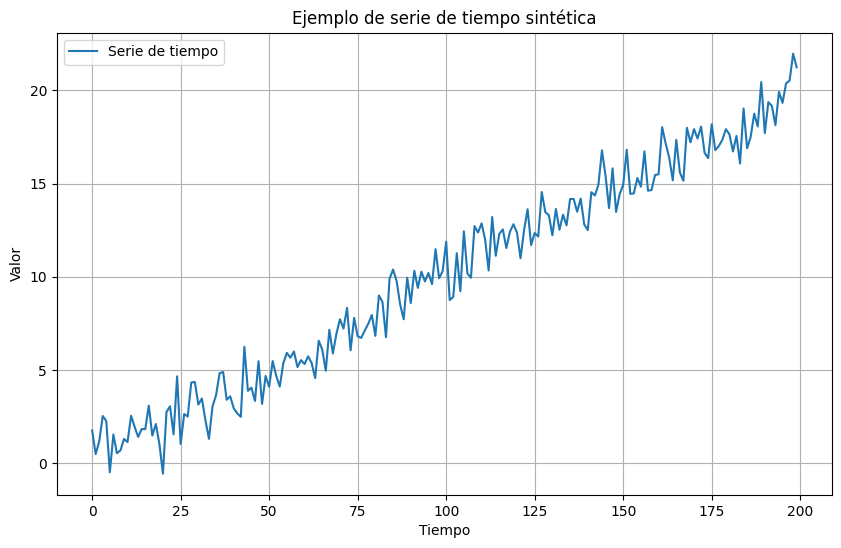

In [2]:
#Graficar la serie de tiempo
plt.figure(figsize=(10, 6))
plt.plot(t, times_series, label='Serie de tiempo')
plt.title('Ejemplo de serie de tiempo sintética')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
# Paso 2: Preparación de datos (ejemplo básico)
# Por ejemplo, transformamos nuestros datos en secuencias
def create_dataset(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

#Definimos el número de pasos de tiempo para la serie temporal
seq_length = 16

#Creamos las secuencias de entrenamiento y prueba en formato 3D
X_train, y_train = create_dataset(train_data, seq_length)
X_test, y_test = create_dataset(test_data, seq_length)

#Imprimimos los conjutos de datos en formato 3D
#print("Conjunto de secuencias de entrenamiento X_train:\n", X_train)
#print("Etiquetas de entrenamiento y_train:\n", y_train)
#print("Conjunto de secuencias de prueba X_test:\n", X_test)
#print("Etiquetas de prueba y_test:\n", y_test)

In [4]:
#3 Contrucción del modelo
model = Sequential()
model.add(LSTM(32,
               activation='relu',
               input_shape=(seq_length, 1),
               return_sequences=True))
model.add(LSTM(32, activation='relu'))
model.add(Dense(1))
model.summary()

#4 Compilación del modelo
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 16, 32)              │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,705 (49.63 KB)

 Trainable params: 12,705 (49.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - loss: 78.3645
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 21.2047
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7.6059
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.8633
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.4251
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6360
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.0223
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.7754
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.5507
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.3703
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.3091
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.4532
Epoch 13/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.4144
Epoch 14/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.2216
Epoch 15/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.1653
Epoch 16/100
5/5 

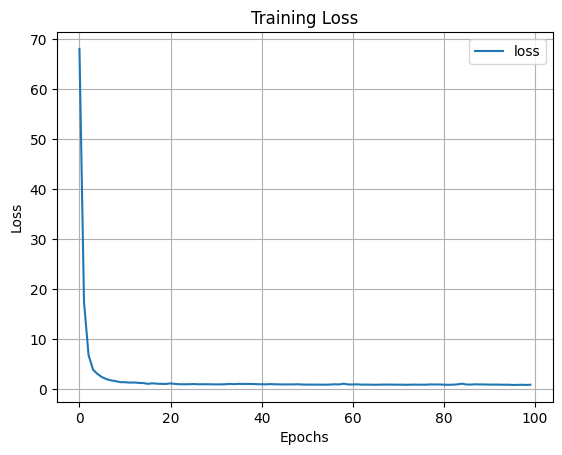

In [5]:
# Paso 5: Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=100)

# Graficar el historial de entrenamiento:
pd.DataFrame(history.history).plot(grid=True)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [6]:
#Paso 6: Evaluación del modelo
Evaluación = model.evaluate(X_test, y_test)
print("Evaluación del modelo:", Evaluación)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step - loss: 2.4351
Evaluación del modelo: 2.435103416442871


Predicción del modelo X_test:
 [[15.50196755 18.02953205 17.14942081 16.38755124 15.17456448 17.34436298
  15.59978465 15.1552289  17.98802979 17.21694261 17.92085882 17.41872765
  18.05683061 16.64897441 16.36575716 18.18159452]
 [18.02953205 17.14942081 16.38755124 15.17456448 17.34436298 15.59978465
  15.1552289  17.98802979 17.21694261 17.92085882 17.41872765 18.05683061
  16.64897441 16.36575716 18.18159452 16.79659034]
 [17.14942081 16.38755124 15.17456448 17.34436298 15.59978465 15.1552289
  17.98802979 17.21694261 17.92085882 17.41872765 18.05683061 16.64897441
  16.36575716 18.18159452 16.79659034 17.01045022]
 [16.38755124 15.17456448 17.34436298 15.59978465 15.1552289  17.98802979
  17.21694261 17.92085882 17.41872765 18.05683061 16.64897441 16.36575716
  18.18159452 16.79659034 17.01045022 17.3444675 ]
 [15.17456448 17.34436298 15.59978465 15.1552289  17.98802979 17.21694261
  17.92085882 17.41872765 18.05683061 16.64897441 16.36575716 18.18159452
  16.79659034 17.01045022 

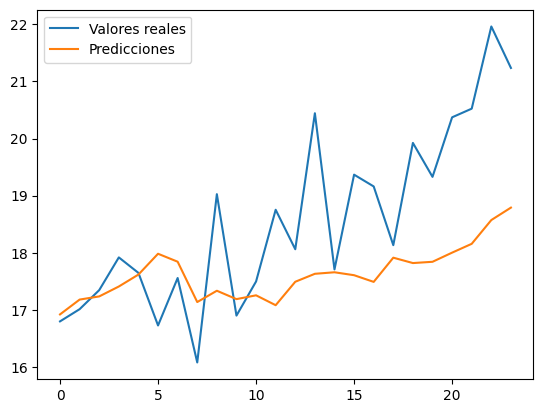

In [7]:
# Paso 7: Predicción
print("Predicción del modelo X_test:\n", X_test)
print("Etiquetas reales y_test:\n", y_test)
y_pred = model.predict(X_test)
print("Predicciones del modelo:\n", y_pred)
plt.plot(y_test, label='Valores reales')
plt.plot(y_pred, label='Predicciones')
plt.legend()
plt.show()